In [1]:
#import libraries
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#import xgboost
from pprint import pprint as p

In [5]:
cancer = load_breast_cancer(as_frame=1)

In [6]:
cancer_df = pd.DataFrame(cancer.frame)

In [7]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
cancer_df.shape

(569, 31)

In [9]:
from collections import Counter
print(Counter(cancer_df.target))

Counter({1: 357, 0: 212})


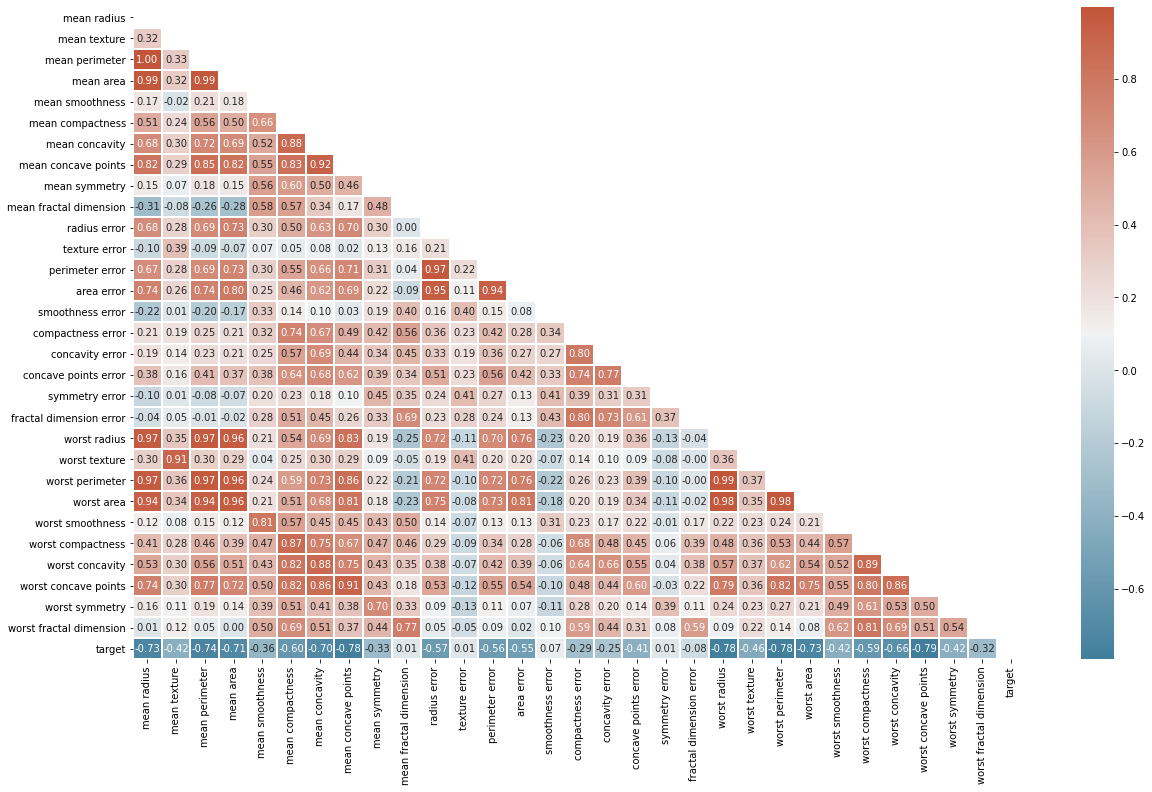

In [10]:
plt.figure(figsize = (20, 12))
corr = cancer_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

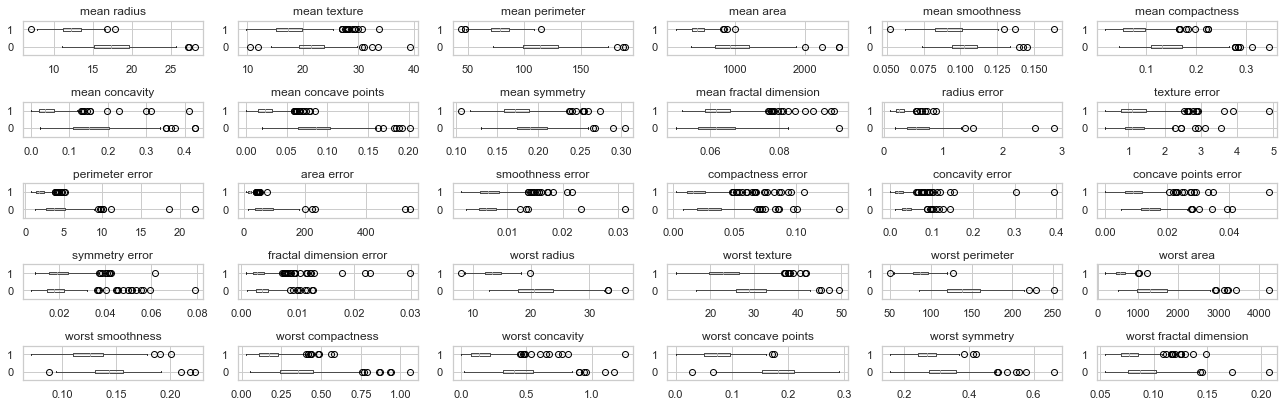

In [14]:
X = cancer_df.drop(columns = 'target')
fig, axes = plt.subplots(5, 6, figsize=(18, 6))
for c, ax in zip(X.columns, axes.ravel()):
    cancer_df[[c, 'target']].boxplot(vert=False, by='target', ax=ax)
    ax.set_xlabel("")
plt.suptitle("")
plt.tight_layout()

<AxesSubplot:xlabel='mean radius', ylabel='mean concave points'>

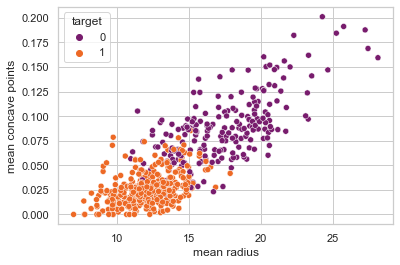

In [12]:
sns.set(style='whitegrid')
sns.scatterplot(x="mean radius",
                    y="mean concave points",hue='target',
                    data=cancer_df, palette="inferno")

In [15]:
corr_matrix = X.corr().abs() 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]
X = X.drop(to_drop, axis = 1)
print(f"The reduced dataframe has {X.shape[1]} columns.")

The reduced dataframe has 20 columns.


In [17]:
X.head()

,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst texture,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
y = pd.DataFrame(cancer_df['target'])

In [22]:
sc = StandardScaler()
X_standardise = sc.fit_transform(X)
X_standardise

array([[ 1.56846633e+00,  3.28351467e+00,  2.21751501e+00, ...,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [-8.26962447e-01, -4.87071673e-01,  1.39236330e-03, ...,
         1.08708430e+00, -2.43889668e-01,  2.81189987e-01],
       [ 9.42210440e-01,  1.05292554e+00,  9.39684817e-01, ...,
         1.95500035e+00,  1.15225500e+00,  2.01391209e-01],
       ...,
       [-8.40483881e-01, -3.86796697e-02, -8.09117071e-01, ...,
         4.14068691e-01, -1.10454895e+00, -3.18409158e-01],
       [ 1.52576706e+00,  3.27214378e+00,  2.13719425e+00, ...,
         2.28998549e+00,  1.91908301e+00,  2.21963528e+00],
       [-3.11208479e+00, -1.15075248e+00, -8.20069901e-01, ...,
        -1.74506282e+00, -4.81382136e-02, -7.51206693e-01]])

In [24]:
def lda_model(data,solver='svd',shrinkage=None):
    X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.25)
    lda = LDA(n_components=1,solver=solver,shrinkage=shrinkage)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    #model = xgboost.XGBClassifier()
    #model1.fit(X_train,y_train)
    #y_cap = model1.predict(X_test)
    print("*"*30)
    print(f"LDA with {solver} :- ")
    print(f"Accuracy score :- {accuracy_score(y_test,y_cap)}")
    print(f"{classification_report(y_test,y_cap)}")
    #return accuracy_score(y_test,y_cap)
lda_model(X_standardise)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


NameError: name 'model1' is not defined